In [58]:
import pandas as pd
import numpy as np
from Univariate import Univariate

In [60]:
data = pd.read_csv('placement.csv')

In [62]:
data.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [64]:
data.shape

(215, 15)

In [66]:
#Find missing values:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [68]:
# Null values are present in "Salary column"
# Handling null values
# on "Status column" who ever not placed got null on salary column
# adding zero to null values to handle null values

### Options to handle Null values:
* Replace the missing values with centrel tendency - Mean,Median, Mode
* Entire row delete
* Respective to the problem, have to replace the missing values
* consider this as a semi supervised, create a model, so that we can predict the missing values.

In [26]:
# adding zero to null values to handle null values
# data.dropna(inplace=True)
data['salary'].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14208\4067596873.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['salary'].fillna(0,inplace=True)


In [71]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [73]:
qual,quan = Univariate.qualQuan(data)

In [75]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [91]:
# another method for handling missing values:
#SimpleImputer
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[quan])
data1 = imp_mean.transform(data[quan])

# Convert back to DataFrame with column names
data1 = pd.DataFrame(data1, columns=quan)

In [93]:
data1.isnull().sum()

sl_no       0
ssc_p       0
hsc_p       0
degree_p    0
etest_p     0
mba_p       0
salary      0
dtype: int64

In [95]:
data1.head(8)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.00,58.80,270000.000000
1,2.0,79.33,78.33,77.48,86.50,66.28,200000.000000
2,3.0,65.00,68.00,64.00,75.00,57.80,250000.000000
3,4.0,56.00,52.00,52.00,66.00,59.43,288655.405405
4,5.0,85.80,73.60,73.30,96.80,55.50,425000.000000
5,6.0,55.00,49.80,67.25,55.00,51.58,288655.405405
6,7.0,46.00,49.20,79.00,74.28,53.29,288655.405405
7,8.0,82.00,64.00,66.00,67.00,62.14,252000.000000


## **Loaded new dataset and handle null values:**

In [127]:
df = pd.read_csv("loan_approved.csv")
df.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [131]:
qual1,quan1 = Univariate.qualQuan(df)

In [133]:
qual1

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status (Approved)']

In [135]:
quan1

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [137]:
#Finding the null values from quan1
df[quan1].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

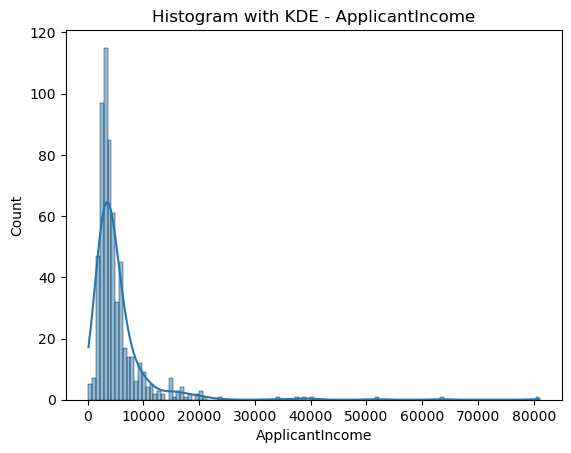

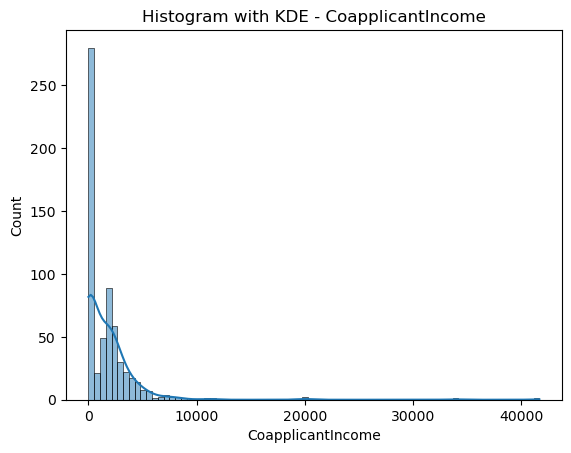

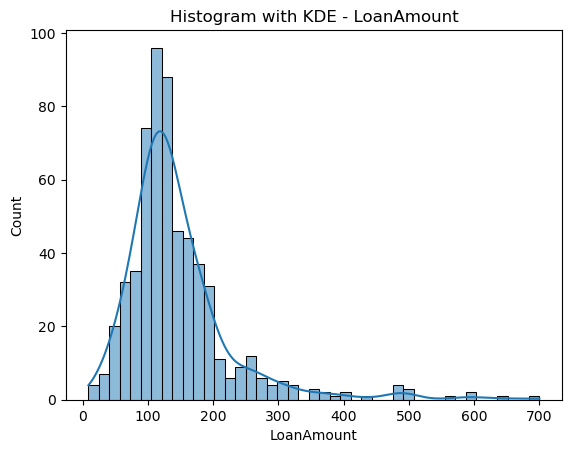

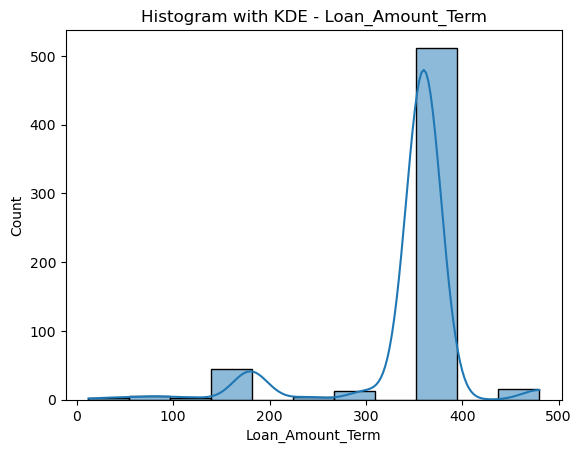

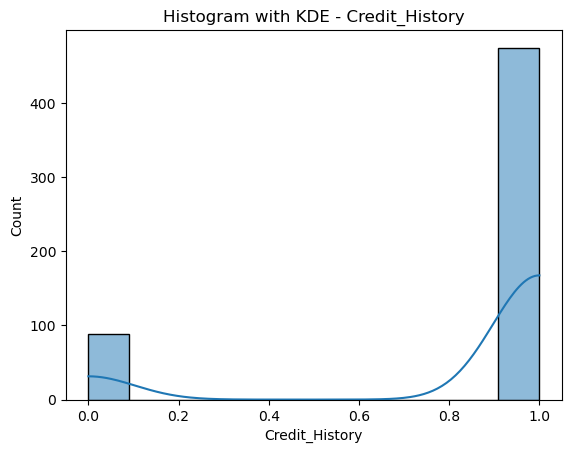

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in quan1:
    sns.histplot(df[quan1][column], kde=True)
    plt.title(f"Histogram with KDE - {column}")
    plt.show()

In [157]:
# handling missing values:
#SimpleImputer with mean values:
imp_mean.fit(df[quan1])
data2 = imp_mean.transform(df[quan1])

# Convert back to DataFrame with column names
data2 = pd.DataFrame(data2, columns=quan1)

In [159]:
data2.isnull().sum()
#now missing values are handled

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [161]:
data2.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
5,5417.0,4196.0,267.000000,360.0,1.0
6,2333.0,1516.0,95.000000,360.0,1.0
7,3036.0,2504.0,158.000000,360.0,0.0
8,4006.0,1526.0,168.000000,360.0,1.0
9,12841.0,10968.0,349.000000,360.0,1.0
